In [9]:
%load_ext autoreload
%autoreload 2

# Add the path to the parent directory to sys
import sys, os

# If current directory is called 'notebooks', chdir to the parent
if os.path.basename(os.getcwd()) == 'notebooks':
    os.chdir('../')
    
sys.path.append('attribution')

from torch.utils.data import DataLoader

import pandas as pd
from constants import ModelNames, DatasetNames, LANGUAGE_MAPPING
from tqdm.notebook import tqdm

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os
import json

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Performance in English with and without COT and constrained decoding

C:\Users\User\AppData\Local\Temp\ipykernel_23100\1854961514.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='Condition', y='Accuracy', data=df_eng, palette='viridis')


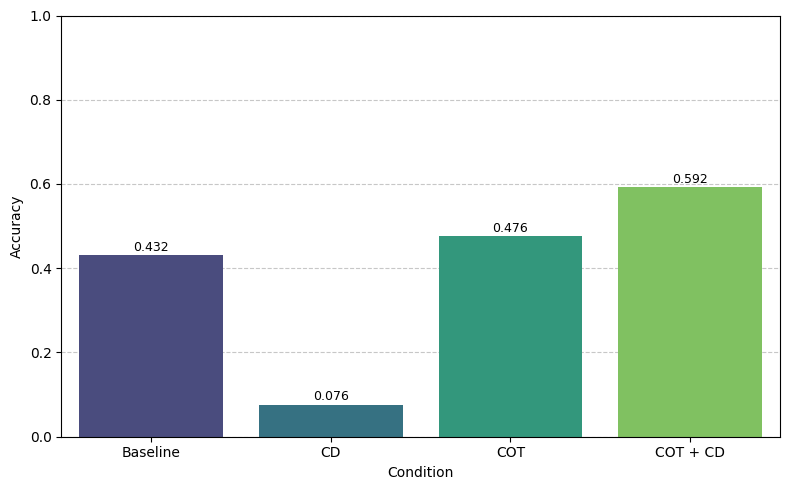

Plot 1 saved as 'results/plots/eng_baseline.png'


In [21]:
# Data dictionary
data = json.load(open('results/metrics/generations.json', 'r'))

# Define output filenames
save_dir = 'results/plots/'
plot1_filename = save_dir + 'eng_baseline.png'

# Ensure plots don't interfere
plt.close('all')

# -----------------------------
# Plot 1: English COT Constrained vs Unconstrained
# -----------------------------
# More convenient structure where conditions are keys to accuracy values
accuracy_values = {
    'Baseline': data["mgsm_en_regular_unconstrained_Qwen2.5-1.5B-Instruct"],
    'CD': data["mgsm_en_regular_constrained_Qwen2.5-1.5B-Instruct"],
    'COT': data["mgsm_en_COT_unconstrained_Qwen2.5-1.5B-Instruct"],
    'COT + CD': data["mgsm_en_COT_constrained_Qwen2.5-1.5B-Instruct"],
}

# Convert to DataFrame format required by seaborn
df_eng = pd.DataFrame({
    'Condition': list(accuracy_values.keys()),
    'Accuracy': list(accuracy_values.values())
})

plt.figure(figsize=(8, 5))  # Slightly larger figure for better readability

# Create the bar plot
ax = sns.barplot(x='Condition', y='Accuracy', data=df_eng, palette='viridis')

# Add a grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar
for i, v in enumerate(df_eng['Accuracy']):
    ax.text(i, v + 0.01, f"{v:.3f}", ha='center', fontsize=9)

# Customize the plot
# plt.title('Accuracy on English subset with Chain-of-Thought (COT) and Constrained Decoding (CD)')
plt.ylim(0, 1)
plt.ylabel('Accuracy')

# Ensure grid is behind bars
ax.set_axisbelow(True)

# Save and show the plot
plt.tight_layout()  # Adjust spacing
plt.savefig(plot1_filename, dpi=300)  # Higher DPI for better quality
plt.show()
print(f"Plot 1 saved as '{plot1_filename}'")

## Performance across languages with and without COT using constrained decoding

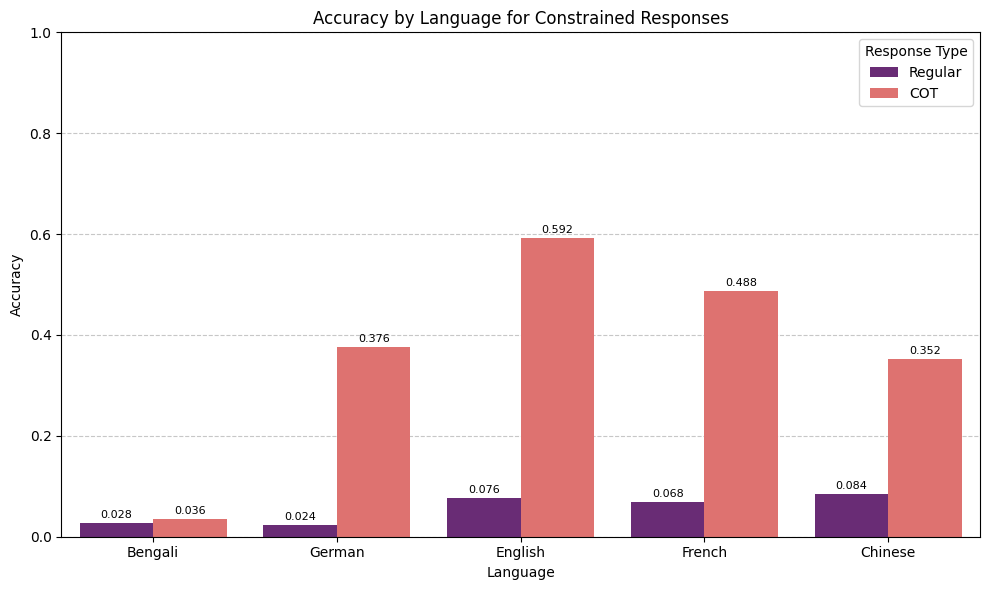

Plot 2 saved as 'results/plots/multi-lang_performance.png'


In [28]:
# -----------------------------
# Plot 2: Accuracy by Language for Constrained Responses (COT vs Regular)
# -----------------------------
languages = ['bn', 'de', 'en', 'fr', 'zh']
plot2_filename = save_dir + 'multi-lang_performance.png'
plot_data = []

for lang in languages:
    reg_key = f"mgsm_{lang}_regular_constrained_Qwen2.5-1.5B-Instruct"
    cot_key = f"mgsm_{lang}_COT_constrained_Qwen2.5-1.5B-Instruct"
    
    # Use full language name from LANGUAGE_MAPPING
    lang_name = LANGUAGE_MAPPING[lang]
    
    # Only add data points if the keys exist
    
    plot_data.append({'Language': lang_name, 'Type': 'Regular', 'Accuracy': data[reg_key]})
    plot_data.append({'Language': lang_name, 'Type': 'COT', 'Accuracy': data[cot_key]})

df_plot2 = pd.DataFrame(plot_data)

plt.figure(figsize=(10, 6))  # Slightly wider to accommodate language names

# Create the bar plot
ax = sns.barplot(x='Language', y='Accuracy', hue='Type', data=df_plot2, palette='magma')

# Add a grid
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add value labels on top of each bar, but only for non-zero values
for i, p in enumerate(ax.patches):
    height = p.get_height()
    if height > 0.001:  # Only label bars with non-zero values
        ax.text(p.get_x() + p.get_width()/2., height + 0.01,
                f'{height:.3f}', ha="center", fontsize=8)

# Customize the plot
plt.title('Accuracy by Language for Constrained Responses')
plt.ylim(0, 1)
plt.ylabel('Accuracy')
plt.legend(title='Response Type')

# Ensure grid is behind bars
ax.set_axisbelow(True)

# Save and show the plot
plt.tight_layout()  # Adjust spacing
plt.savefig(plot2_filename, dpi=300)  # Higher DPI for better quality
plt.show()
print(f"Plot 2 saved as '{plot2_filename}'")